### Entropía de Shannon

La **entropía de Shannon** mide el nivel de incertidumbre o sorpresa asociado a una variable aleatoria. En el contexto de la información, representa la cantidad promedio de información producida por una fuente de datos.

#### Ecuación
Utilizando el logaritmo en base 2 (donde la unidad de medida es el **bit**), la fórmula es:

$$H(X) = -\sum_{i=1}^{n} P(x_i) \log_2 P(x_i)$$

Donde $P(x_i)$ es la probabilidad de que ocurra el evento $x_i$.

#### Valores Límites
*   **Valor Mínimo (0):** La entropía es **0** cuando no hay incertidumbre. Esto ocurre cuando uno de los eventos tiene probabilidad 1 (el resultado es determinista). No hay "sorpresa". La variable es constante.
*   **Valor Máximo ($\log_2 n$):** La entropía es máxima cuando todos los eventos son igualmente probables (**distribución uniforme**). Para $n$ clases, el valor máximo es $\log_2(n)$ bits. Por ejemplo, en un sistema de 2 clases equiprobables, el máximo es $\log_2(2) = 1$ bit.

### En Python
- Manual
  ```python
  values, counts = np.unique(x, return_counts=True)
  probs = counts / counts.sum()
  H = -np.sum(probs * np.log(probs))
  ```

- scipy
  ```python
  values, counts = np.unique(x, return_counts=True)
  probs = counts / counts.sum()
  H = entropy(probs)
  ```

- valores numéricos
  ```python
  hist, bin_edges = np.histogram(x, bins='fd')
  probs = hist / hist.sum()
  probs = probs[probs > 0]
  H = -np.sum(probs * np.log(probs))

  """
  k can be:
  k = [log2(size)+1]
  k = sqrt(size)
  Utilizar Freedman-Diaconis -> np.histogram(x, bins='fd')
  """
  ```


In [60]:
def entropy(x, type='reg'):
  if type == 'reg':
    hist, bin_edges = np.histogram(x, bins=4)
    probs = hist / hist.sum()
    probs_no = probs[probs > 0]
  else:
    values, counts = np.unique(x, return_counts=True)
    probs = counts / counts.sum()
    probs_no = probs

  H = -np.sum(probs_no * np.log2(probs_no))
  return H, probs


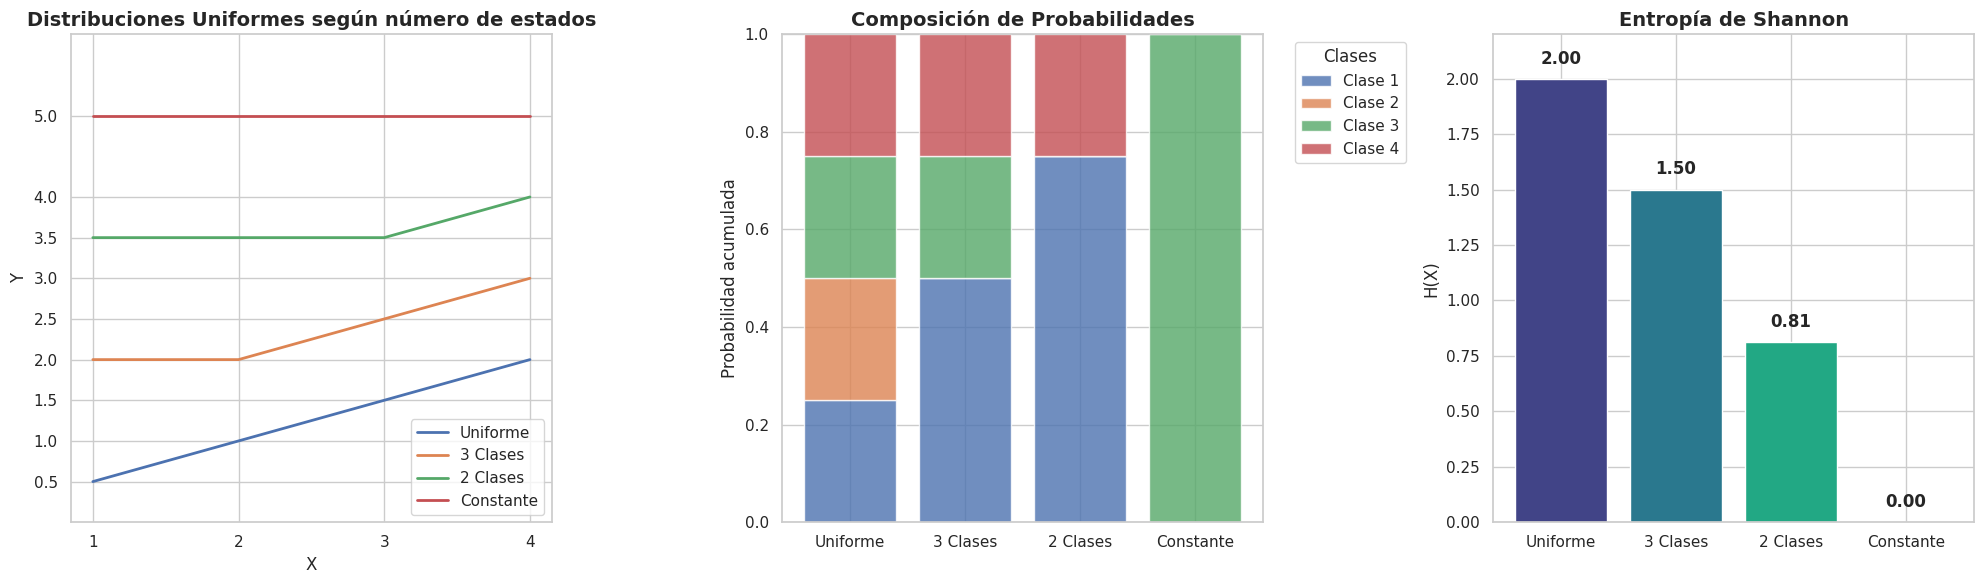

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Escenarios function
scenarios_function = {
    "Uniforme": ([1,2,3,4], [0.5,1,1.5,2]),
    "3 Clases": ([1,2,3,4], [2,2,2.5,3]),
    "2 Clases": ([1,2,3,4], [3.5,3.5,3.5,4]),
    "Constante": ([1,2,3,4], [5,5,5,5])
}

labels = list(scenarios_function.keys())

entropies = []
probabilidades = []

for v in scenarios_function.values():
    H, probs = entropy(v[1])
    entropies.append(H)
    probabilidades.append(probs)

sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

x = np.linspace(1, 4, 100)

for label, coords in scenarios_function.items():
    x = coords[0]
    y = coords[1]
    ax1.plot(x, y, linewidth=2, label=f"{label}")

ax1.set_title("Distribuciones Uniformes según número de estados",
              fontsize=14, fontweight='bold')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_ylim(0, 6)
ax1.set_xticks([1,2,3,4])
ax1.set_yticks([0.5,1,1.5,2,2.5,3,3.5,4,5])
ax1.legend()

# ==================================================
# 2️⃣ Probabilidades reales (stacked bar)
# ==================================================
bottom = np.zeros(len(labels))

for i in range(4):
    probs_i = [v[i] for v in probabilidades]
    ax2.bar(labels, probs_i, bottom=bottom, alpha=0.8, label=f'Clase {i+1}')
    bottom += probs_i

ax2.set_title("Composición de Probabilidades",
              fontsize=14, fontweight='bold')
ax2.set_ylabel("Probabilidad acumulada")
ax2.legend(title="Clases", bbox_to_anchor=(1.05, 1), loc='upper left')

# ==================================================
# 3️⃣ Entropía
# ==================================================
colors = sns.color_palette("viridis", len(labels))
bars = ax3.bar(labels, entropies, color=colors)

ax3.set_title("Entropía de Shannon",
              fontsize=14, fontweight='bold')
ax3.set_ylabel("H(X)")
ax3.set_ylim(0, 2.2)

for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ===============================
# Escenarios funcionales
# ===============================
scenarios_function = {
    "Uniforme (4)": ([1,2,3,4], [0.5,1,1.5,2]),
    "3 Clases": ([1,2,3,4], [2,2,2.5,3]),
    "2 Clases": ([1,2,3,4], [3.5,3.5,3.5,4]),
    "Constante (1)": ([1,2,3,4], [5,5,5,5])
}

order = list(scenarios_function.keys())

# ===============================
# Función para dibujar cada etapa
# ===============================
def plot_stage(n):
    selected_labels = order[:n]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

    # ==============================
    # 1️⃣ Funciones
    # ==============================
    for label in selected_labels:
        x, y = scenarios_function[label]
        ax1.plot(x, y, marker='o', linewidth=2, label=label)

    ax1.set_title("Y = f(X)", fontsize=14, fontweight='bold')
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_ylim(0, 6)
    ax1.set_xticks([1,2,3,4])
    ax1.legend()

    # ==============================
    # 2️⃣ Probabilidades (stacked bar usando histogramas de la función entropy)
    # ==============================
    bottom = np.zeros(len(order))
    x_positions = np.arange(len(order))

    for i in range(4):  # 4 bins/clases
        probs_i = []
        for label in order:
            if label in selected_labels:
                _, probs = entropy(scenarios_function[label][1], type='reg')
                # Si el bin i no existe (menos de 4 bins con valores >0), ponemos 0
                probs_i.append(probs[i] if i < len(probs) else 0)
            else:
                probs_i.append(0)
        ax2.bar(x_positions, probs_i, bottom=bottom, alpha=0.8)
        bottom += probs_i

    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(order)
    ax2.set_title("Composición de Probabilidades (bins)", fontsize=14, fontweight='bold')
    ax2.set_ylabel("Probabilidad acumulada")
    ax2.set_ylim(0, 1.05)

    # ==============================
    # 3️⃣ Entropía (eje fijo)
    # ==============================
    entropies = []
    for label in order:
        if label in selected_labels:
            H, _ = entropy(scenarios_function[label][1], type='reg')
            entropies.append(H)
        else:
            entropies.append(0)

    ax3.bar(x_positions, entropies)
    ax3.set_xticks(x_positions)
    ax3.set_xticklabels(order)
    ax3.set_title("Entropía de Shannon", fontsize=14, fontweight='bold')
    ax3.set_ylabel("H(X)")
    ax3.set_ylim(0, 2.5)  # fijo para 4 bins

    plt.tight_layout()
    plt.show()



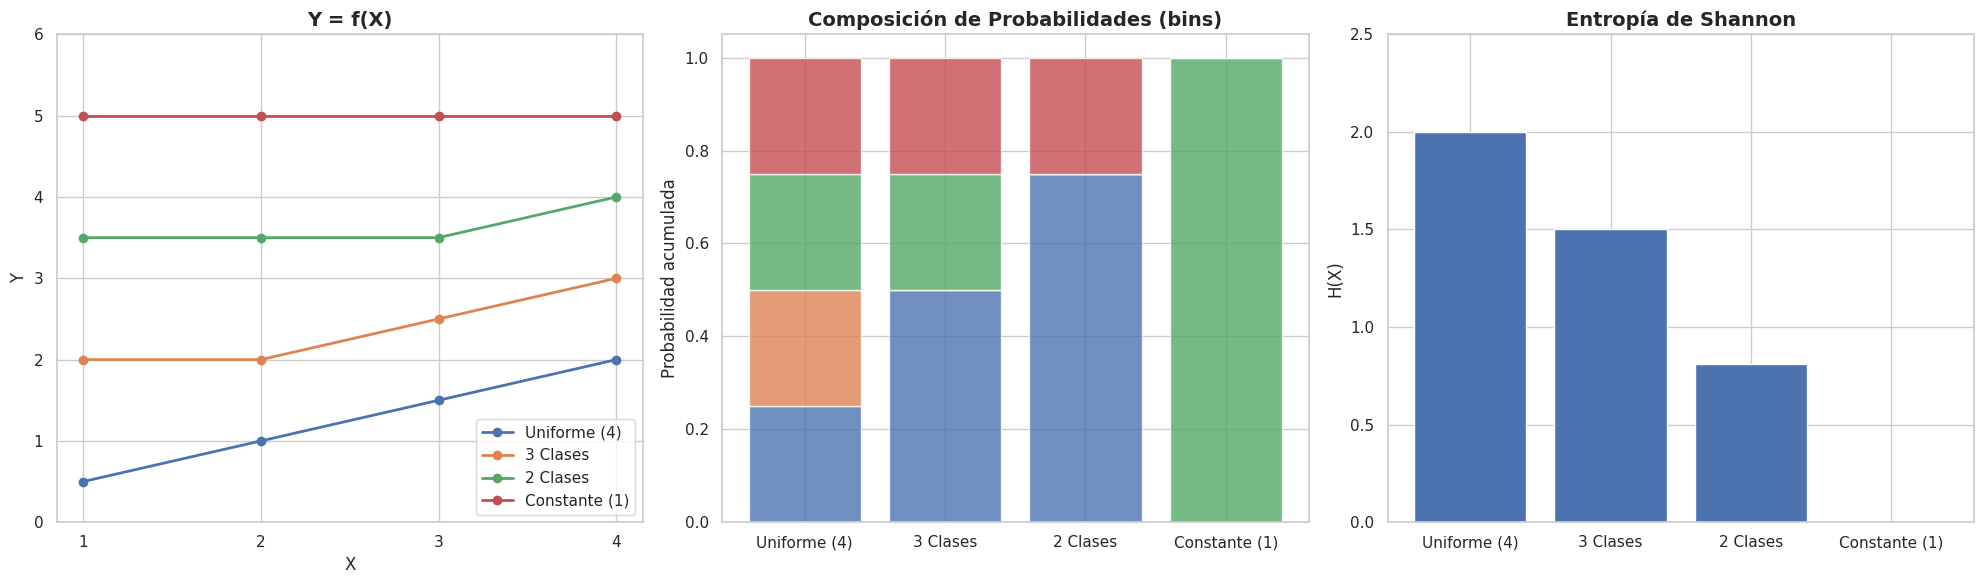

In [63]:
plot_stage(4)